In [1]:
import itertools

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib

from sklearn.neighbors import KNeighborsClassifier

matplotlib.style.use('ggplot')

In [2]:
data = 'mary_and_temperature_preferences.txt'
print(open(data, 'r').read())

10 0 cold
25 0 warm
15 5 cold
20 3 warm
18 7 cold
20 10 cold
22 5 warm
24 6 warm


In [3]:
X, Y, temperatures = [], [], []

with open(data, 'r') as reader:
    line = reader.readline()
    
    while line != '':
        preferences = line.split()

        X.append([int(preferences[0]), int(preferences[1])])
        Y.append(preferences[2])

        line = reader.readline()

In [4]:
neigh = KNeighborsClassifier(n_neighbors=1)

In [5]:
neigh.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [6]:
neigh.predict([[15, 5]])

array(['cold'], dtype='<U4')

In [7]:
min_temp = 5
max_temp = 30
min_wind = 0
max_wind = 10

climates = list(itertools.product(range(min_temp, max_temp + 1), range(min_wind, max_wind + 1)))
print(len(climates))

286


In [8]:
for climate in climates:
    temp = climate[0]
    wind = climate[1]
    
    temperatures.append([temp, wind, neigh.predict([[temp, wind]])[0]])

In [9]:
df = pd.DataFrame(temperatures)
df.columns = ['temp', 'wind', 'perception']

# Change the perception to colors to plt
df.loc[df['perception'] == 'warm', ['perception']] = 'red'
df.loc[df['perception'] == 'cold', ['perception']] = 'blue'

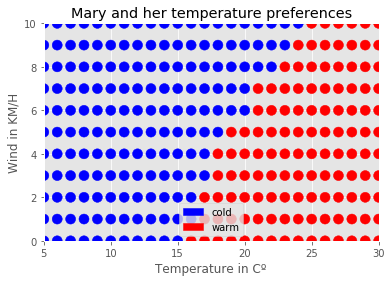

In [10]:
plt.title('Mary and her temperature preferences')
plt.xlabel('Temperature in Cº')
plt.ylabel('Wind in KM/H')
plt.axis([min_temp, max_temp, min_wind, max_wind])

blue_patch = mpatches.Patch(color='blue', label='cold')
red_patch = mpatches.Patch(color='red', label='warm')

plt.legend(handles=[blue_patch, red_patch])
plt.scatter(df['temp'], df['wind'], c=df['perception'], s=100)

plt.show()